In [2]:
#Import all the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#Read the data using pandas dataframe

data = pd.read_csv("housing.csv")

In [4]:
# Visualise the data table using describe and keys

print(data.keys()) # All features and Target variables
print(data.describe()) # Displays the Mean, standard deviation etc

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.

In [5]:
#Data Preprocessing ( check for missing values )

missing_values= data.isnull().sum()
print("Missing Values : \n", missing_values)

#Since we dont have any missing values as the data set is clean we can proceed to split the dataset

Missing Values : 
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [6]:
#Create 2 new datasets from the previous dataset which contains features and target values respectively
X= data.drop('MEDV',axis=1)
Y= data['MEDV']
X.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [7]:
Y.head() #Display the head values

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [8]:
#Split the dataset into training and testing dataset &0:30 ratio ( specific as 0.3 in the code below )

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [9]:
#Print the shapes of the training and testing datasets in order to confirm the code execution done above
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [10]:
# Assign the Linear regression model to the variable "model", and train the model with one column NOX - Nitrogen Oxides concentration in the air
model= LinearRegression()
model.fit(X_train[['NOX']],Y_train)

LinearRegression()

In [11]:
#Model predicts the values of testing dataset and we represent the predicted target values and the actual target values in the dataset ('MEDV')
y_pred=model.predict(X_test[['NOX']])
predicted_df=pd.DataFrame({'Actual Y': Y_test,'Predicted Y' : y_pred})
print(predicted_df)

     Actual Y  Predicted Y
173      23.6    24.560806
274      32.4    26.620382
491      13.6    21.324329
72       22.8    27.731899
452      16.1    17.924394
..        ...          ...
441      17.1    17.041719
23       14.5    23.645439
225      50.0    24.756956
433      14.3    17.924394
447      12.6    17.041719

[152 rows x 2 columns]


In [12]:
#Find MSE and R2 score
mse = mean_squared_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)
print(f'Mean Squared error (MSE) : {mse}')
print(f'The R2 score is : {r2}')

# The MSE measures the average squared difference between the actual target values and the predicted values.
# Lower MSE values indicate better model performance.
# R2 score is positive which is lesser than 0.5 which indicates that the model isnt much related to the nitrogen concentration


Mean Squared error (MSE) : 59.997408245664175
The R2 score is : 0.19480719746748232


In [13]:
X_test_numpy = X_test['NOX'].values  # Extract the 'RM' feature as a NumPy array
y_test_numpy = Y_test.values  # Convert y_test to a NumPy array

# Sort the data based on the 'RM' feature
sorted_indices = X_test_numpy.argsort()
X_test_sorted = X_test_numpy[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

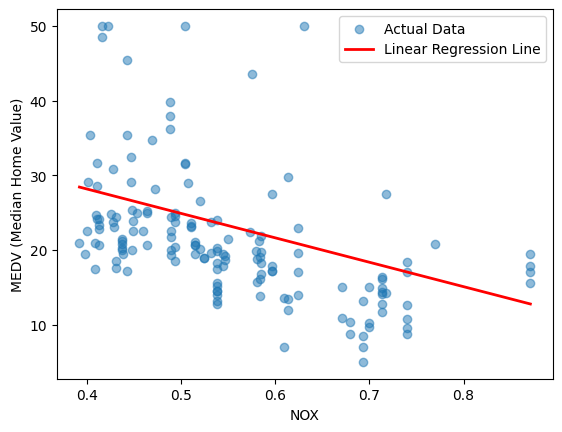

In [14]:
#Plotting the chart for actual values and the regression line

plt.scatter(X_test_sorted, y_test_numpy[sorted_indices], label='Actual Data', alpha=0.5)
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('NOX')
plt.ylabel('MEDV (Median Home Value)')
plt.legend()
plt.show()

In [15]:
#Determine the interncept b0 and the coeff values b1
intercept = model.intercept_
coefficients = model.coef_

print("Intercept (b0):", intercept)
print("Coefficient of NOX (b1):", coefficients[0])

#The coefficient of NOX is negative, indicating that the higher the nitrogen oxide concentration in air the lower the median prices of homes

Intercept (b0): 41.2335641540636
Coefficient of NOX (b1): -32.69168271341337


Multiple Linear Regression for features

In [16]:
#Make new datasets containing few features and target variable respectively
X=data.drop('MEDV',axis=1)
Y=data['MEDV']

In [17]:
#Split the dataset into training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [18]:
print(X_test.shape)
print(Y_test.shape)

(152, 13)
(152,)


In [19]:
#Fit the datasset into the multiple linear regression model. columns selected are NOX,INDUX and RM for this part
multiple_linear_model=LinearRegression()
cols=['NOX','INDUS','RM']
X_train_subset=X_train[cols]

#Subset the training set into a 3 column dataset and use it further for performing more operations

X_test_subset=X_test[cols]
multiple_linear_model.fit(X_train_subset,Y_train)
print(X_train_subset.head())

       NOX  INDUS     RM
5    0.458   2.18  6.430
116  0.547  10.01  6.176
45   0.448   6.91  5.682
16   0.538   8.14  5.935
468  0.580  18.10  5.926


In [20]:
#Predict usign the multiple Linear regression model
y_pred=multiple_linear_model.predict(X_test_subset)

In [21]:
#Create a dataset representing the actual target values and the predicted target values for reference
Predicted_df= pd.DataFrame({'Actual MEDV:': Y_test, 'Predicted MEDV:': y_pred })
Predicted_df.head()

,Actual MEDV:,Predicted MEDV:
173,23.6,25.247884
274,32.4,28.382759
491,13.6,17.405837
72,22.8,22.613058
452,16.1,20.058912


In [22]:
# Calculate the Mean Squared Error (MSE)
mse_multiple = mean_squared_error(Y_test, y_pred)

# Calculate R-squared (R2)
r2_multiple = r2_score(Y_test, y_pred)

#MSE of 33.051 is a good score although the r2 score is significantly higher than 0.5 indicating that their relation of multiple features (NOX, INDUS and RM) together play an important role in determining the target value

print("Mean Squared Error (MSE) for Multiple Linear Regression:", mse_multiple)
print("R-squared (R2) for Multiple Linear Regression:", r2_multiple)



Mean Squared Error (MSE) for Multiple Linear Regression: 33.05184649702603
R-squared (R2) for Multiple Linear Regression: 0.556429024386429


In [24]:
X_test_subset.shape

(152, 3)

In [26]:
Y_test.shape

(152,)

In [ ]:
coefficients = multiple_linear_model.coef_
intercept = multiple_linear_model.intercept_

# Create a DataFrame to display the coefficients and their corresponding feature names
coefficients_df = pd.DataFrame({'Feature': X_test_subset.columns, 'Coefficient': coefficients})

# Display the intercept
print("Intercept (b0):", intercept)

# Display the coefficients for each feature
print(coefficients_df)

# The intercepts for NOX ( Nitrogen oxide levels ) and INDUS ( Area of non retail buisness ) is negative which means that as they go lower the median home values go higher wheras the RM value being positive suggests that as there are more rooms in the house higher the median price of the housing

Intercept (b0): -19.813113660668755
  Feature  Coefficient
0     NOX   -11.383374
1   INDUS    -0.136969
2      RM     8.014533
